In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('measures_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 64 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   record_id                                          678 non-null    object 
 1   redcap_event_name                                  678 non-null    object 
 2   total_invites                                      678 non-null    int64  
 3   redcap_survey_identifier                           0 non-null      float64
 4   partstatus                                         678 non-null    float64
 5   new_current                                        266 non-null    float64
 6   mini_timestamp                                     87 non-null     object 
 7   mini_suicide_sum                                   122 non-null    float64
 8   mini_suicide_dx                                    122 non-null    float64
 9   mini_suici

In [3]:
df['record_id'].nunique()

122

In [4]:
df['columbia_suicide_questionnaire_complete'].value_counts()

0.0    413
2.0     25
Name: columbia_suicide_questionnaire_complete, dtype: int64

In [5]:
df_risk = df.loc[df['phq9_q9_only']>0, ['record_id','redcap_event_name','partstatus','phq9_q9_only',
                                        'csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6','csrs_q7',
                                        'columbia_suicide_questionnaire_complete','columbia_risk_score']]
df_risk.drop_duplicates(subset=['record_id','redcap_event_name'])
df_risk.reset_index(inplace=True)
df_risk.drop(columns='index', inplace=True)
df_risk

,record_id,redcap_event_name,partstatus,phq9_q9_only,csrs_q1,csrs_q2,csrs_q3,csrs_q4,csrs_q5,csrs_q6,csrs_q7,columbia_suicide_questionnaire_complete,columbia_risk_score
0,CF322AUD,week_6,2.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
1,CF322AUD,week_12,2.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,Low Risk
2,CM255AUD,week_4,2.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
3,CM255AUD,week_6,2.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
4,CM269AUD,week_2,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
5,CM294AUD,week_2,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
6,CM294AUD,week_4,2.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,2.0,High Risk
7,CM297AUD,week_2,99.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
8,CM297AUD,week_4,99.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
9,MF223AUD,week_8,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk


In [6]:
#df_risk.to_html('df_risk.html', index=False)

In [7]:
for i,row in df_risk.iterrows():
    risk = 'None'
    if row['csrs_q6'] == 1 or row['csrs_q5']==1 or row['csrs_q4']==1:
        if row['csrs_q7'] == 1:
            risk = 'High'
        else:
            risk = 'Moderate'
    elif row['csrs_q3'] == 1:
        risk = 'Moderate'
    elif row['csrs_q1'] == 1 or row['csrs_q2'] == 1:
        risk = 'Low'
    else:
        risk = 'None'
    df_risk.loc[df_risk.index[i], 'columbia_risk'] = risk

#df_risk['columbia_past3months'] = np.where(df_risk['csrs_q7']==1,'Yes','No')

df_risk[['csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6']] = df_risk.loc[:,['csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6']].replace({1:"yes",0:"no",np.nan:"NA"})

df_risk.rename(columns={'csrs_q1':'wished_dead','csrs_q2':'actual_thoughts','csrs_q3':'thinking_about_plan','csrs_q4':'thoughts_plus_intention','csrs_q5':'details_and_intent_of_plan','csrs_q6':'prior_self_harm_lifetime',}, inplace=True)

df_risk.rename(columns={'columbia_suicide_questionnaire_complete':'columbia_complete','colubia_risk_score':'columbia_risk_redcap'}, inplace=True)

df_risk['record_id'] = df_risk.apply({'record_id':lambda x: x[1:]})

df_risk = df_risk[df_risk.record_id != "M237AUD"]

df_risk.to_csv('columbia_risk.csv', index=False)

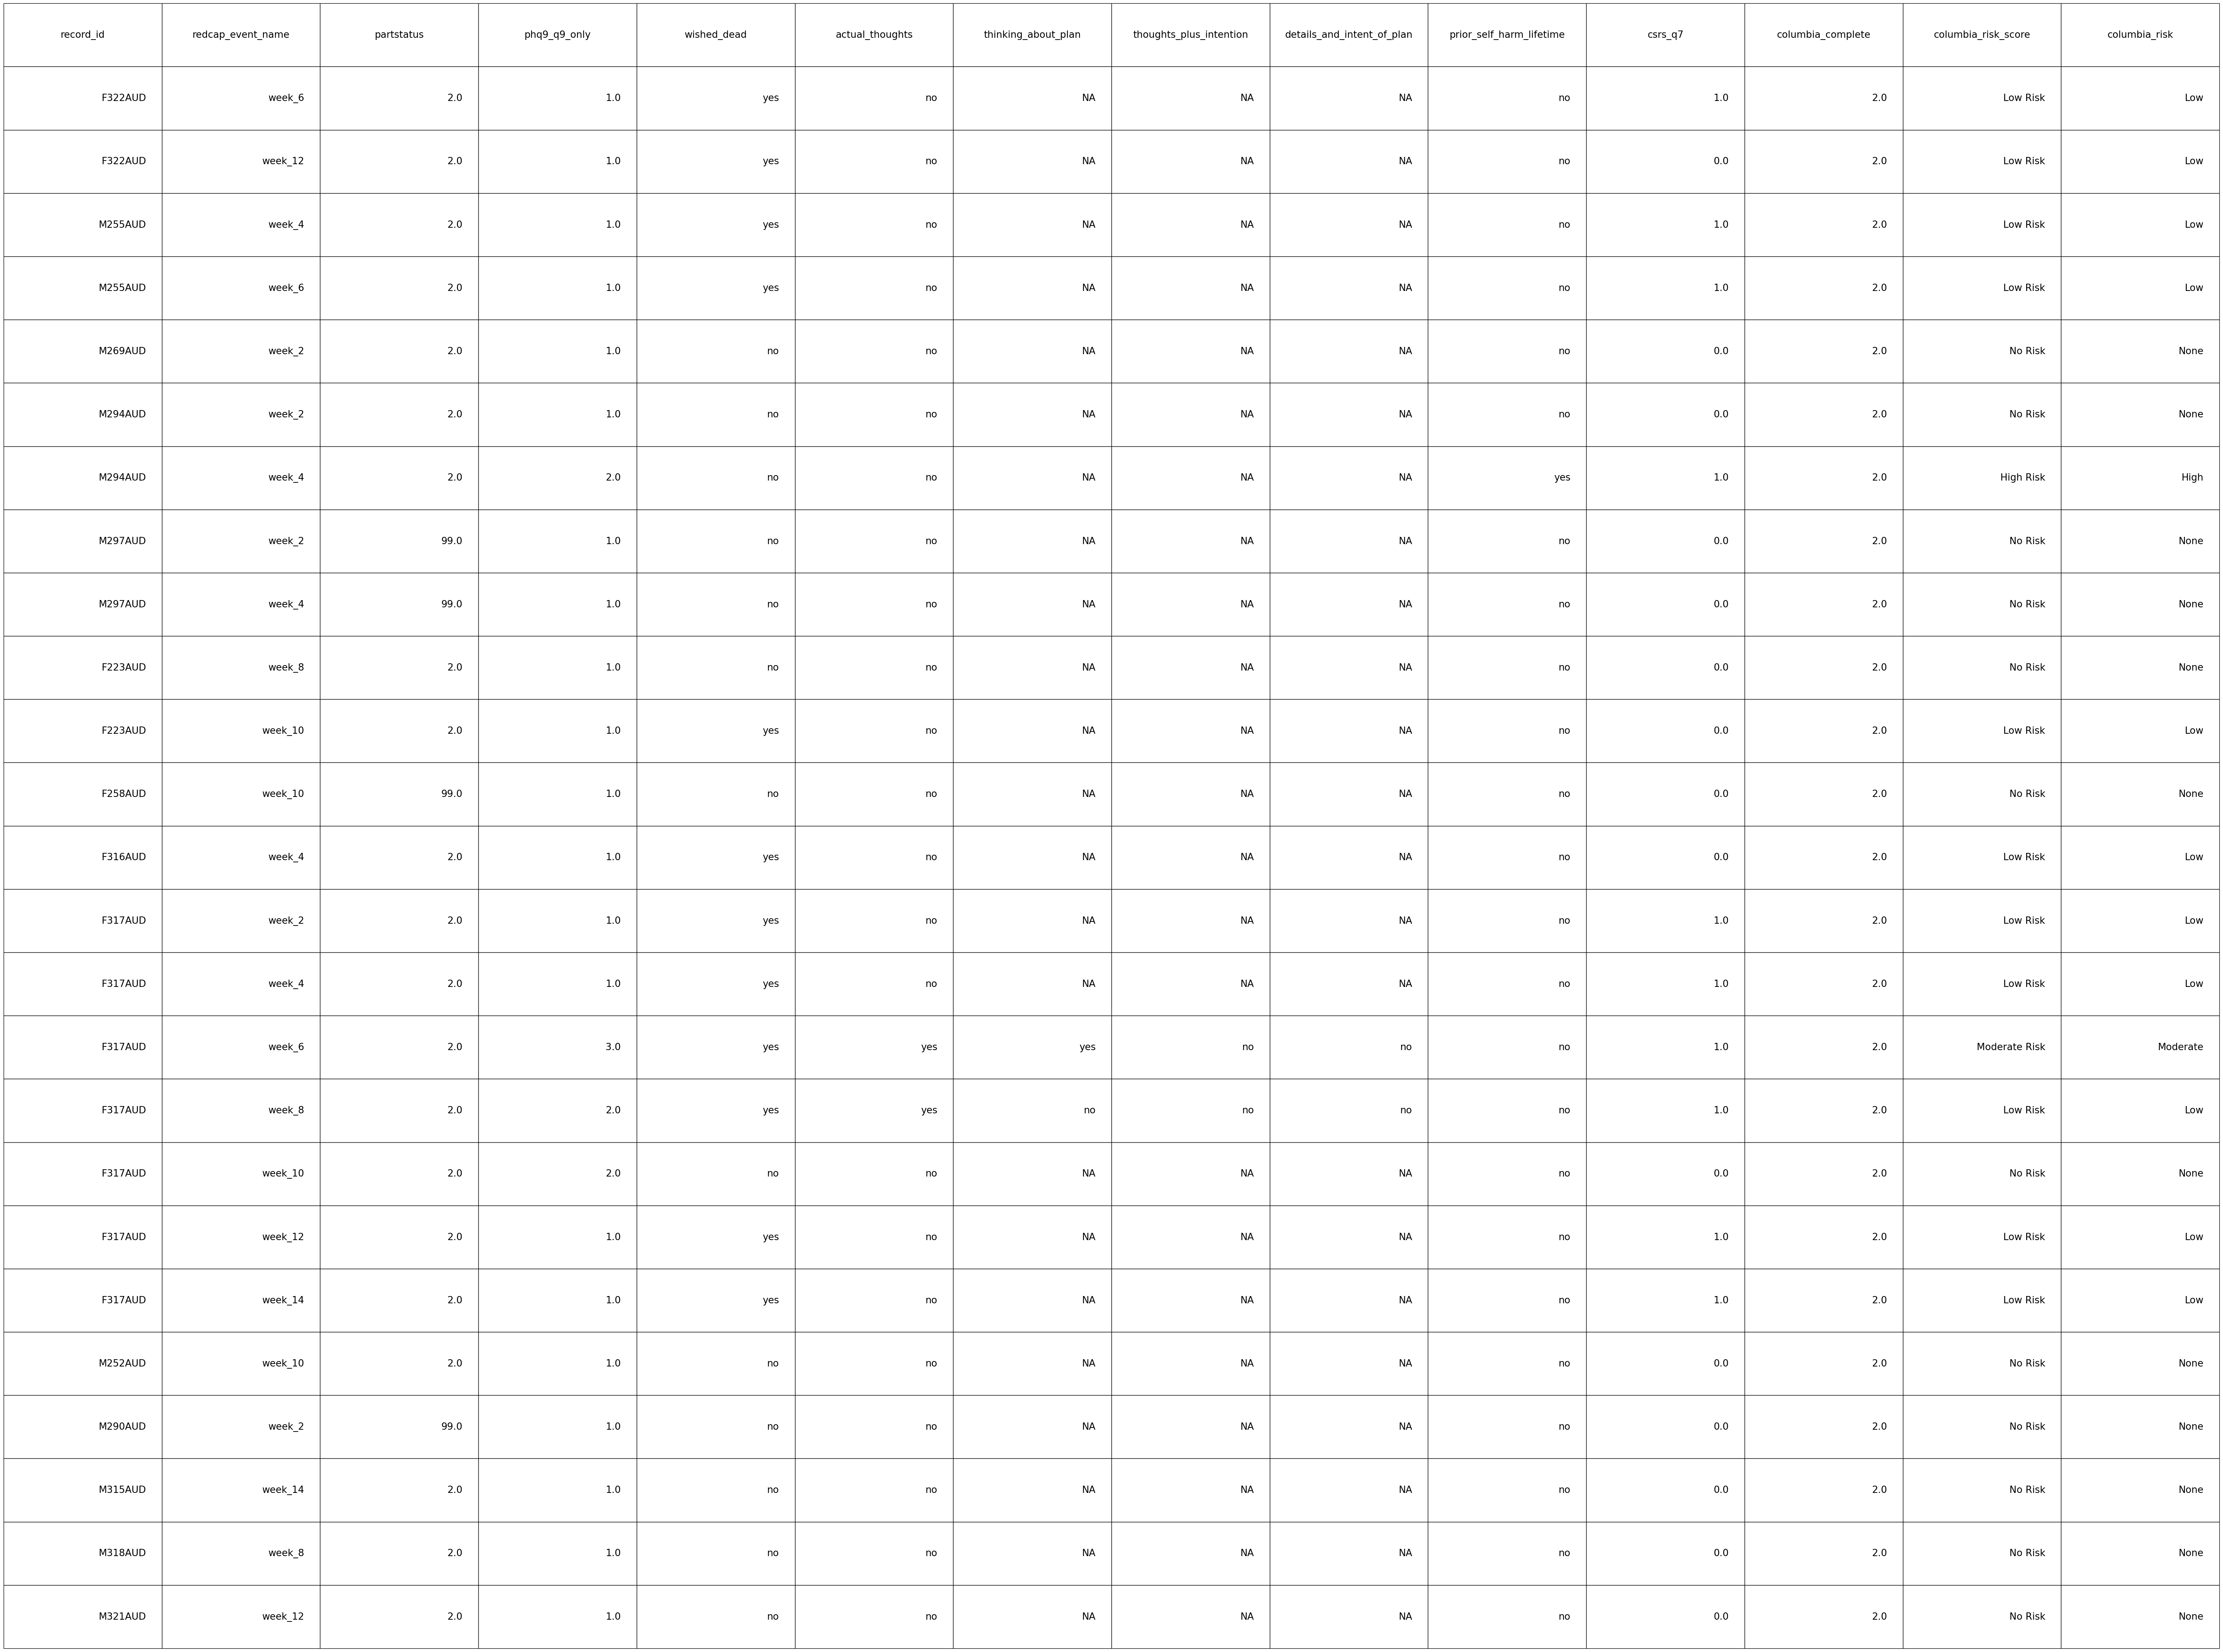

In [8]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=df_risk.values, colLabels=df_risk.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(40)
table.scale(10,10)
plt.show()